In [31]:
#Importation des libreries
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Durée du signal
t=np.linspace(0 , 1 , 1000)

In [33]:
#Génération du signal synthétique
f=10  #fréqunence
A=1   #Amplitude
s_t=A*np.sin(2*np.pi*f*t)  #Le signal

Text(0.5, 1.0, 'signal sinusoidal en fonction du temps')

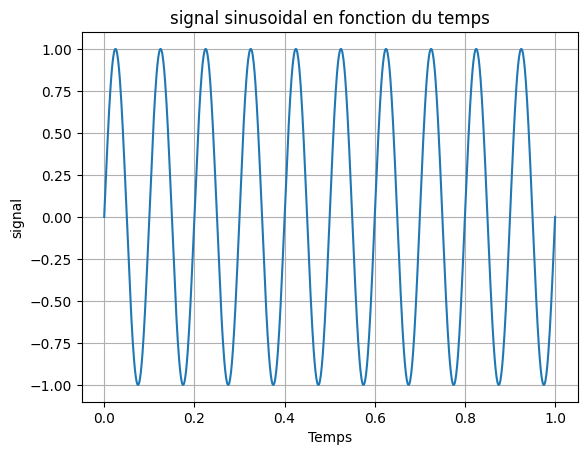

In [34]:
#Affichage du signal original
plt.figure()
plt.plot(t, s_t)
plt.xlabel('Temps')
plt.ylabel('signal')
plt.grid(True)
plt.title('signal sinusoidal en fonction du temps')

In [35]:
#Génération du bruit blanc
b=np.random.normal(0, 0.5, 1000)

In [36]:
#Ajout du bruit blanc au signal
s_b=s_t+b

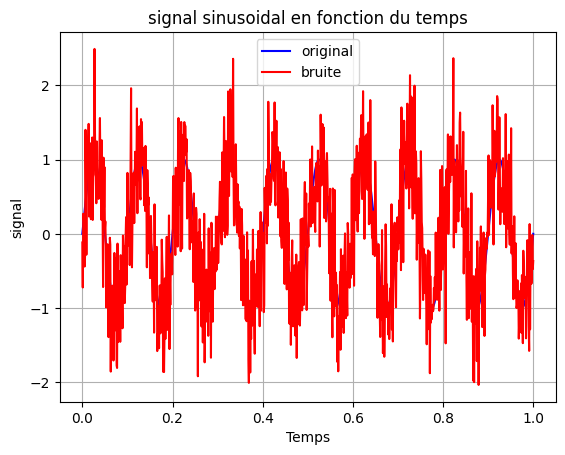

In [37]:
#Affichage du signal orignal et bruité superposé
plt.figure()
plt.plot(t, s_t, color='b', label='original')
plt.plot(t, s_b, color='r', label='bruite')
plt.xlabel('Temps')
plt.ylabel('signal')
plt.grid(True)
plt.title('signal sinusoidal en fonction du temps')
plt.legend()

In [38]:
#Définition du filtre moyen glissant
def moy_gli(n):
  return np.ones(n)/n

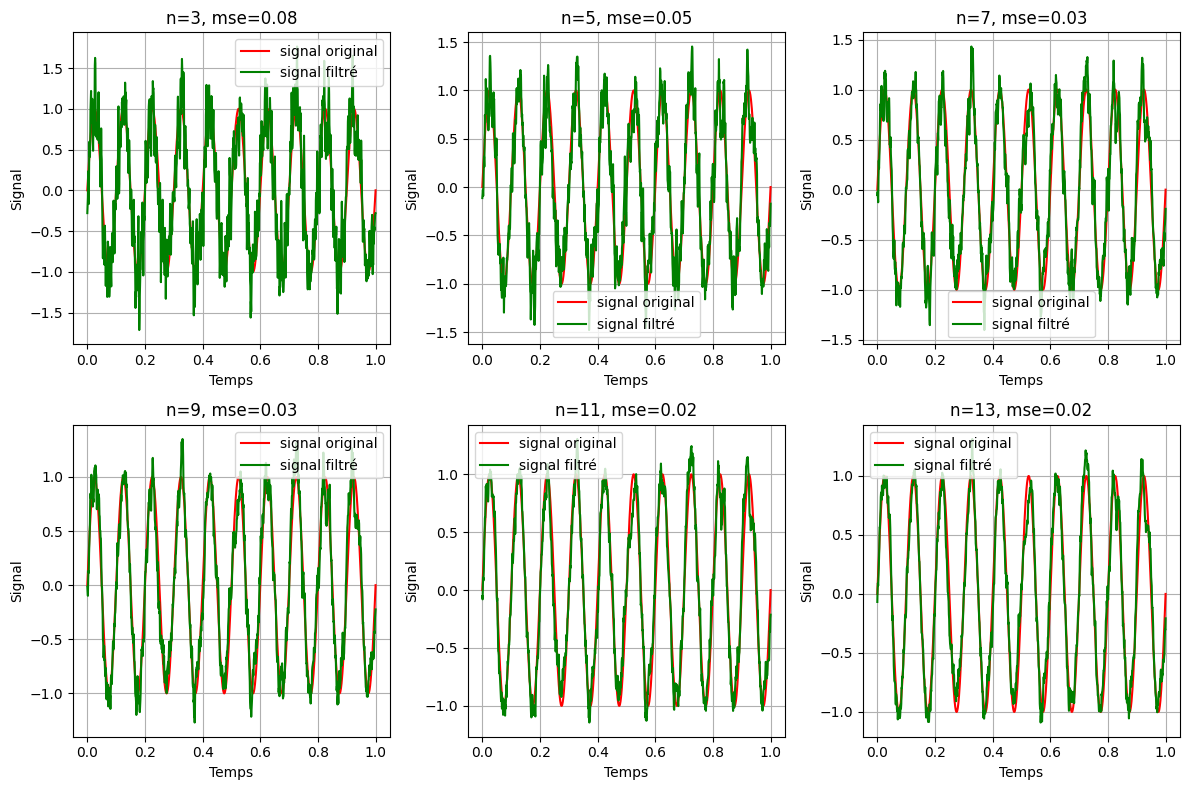

In [39]:
#Application du filtre moyen
N=[3 , 5 , 7 , 9 , 11, 13]
s_filtré=[]
plt.figure(figsize=(12,8))
MSE_m=[]
for i ,n in enumerate(N):
  s=np.convolve(s_b, moy_gli(n), mode='same')
  s_filtré.append(s)
  mse=np.sum((s-s_t)**2/len(s_t))
  MSE_m.append(mse)
  plt.subplot(2, 3, i+1)
  plt.plot(t, s_t, color='r', label='signal original')
  plt.plot(t, s, color='g', label='signal filtré' )
  plt.grid(True)
  plt.xlabel('Temps')
  plt.ylabel('Signal')
  plt.title(f"n={n}, mse={mse:.2f}")
  plt.legend()
plt.tight_layout()


In [40]:
#Implementation du filtre gaussien
def gaussian(size, sigma):
  x=np.linspace(-size//2, size//2, size)
  kernel=np.exp(-x**2/(2*sigma**2))
  kernel=kernel/np.sum(kernel)
  return kernel


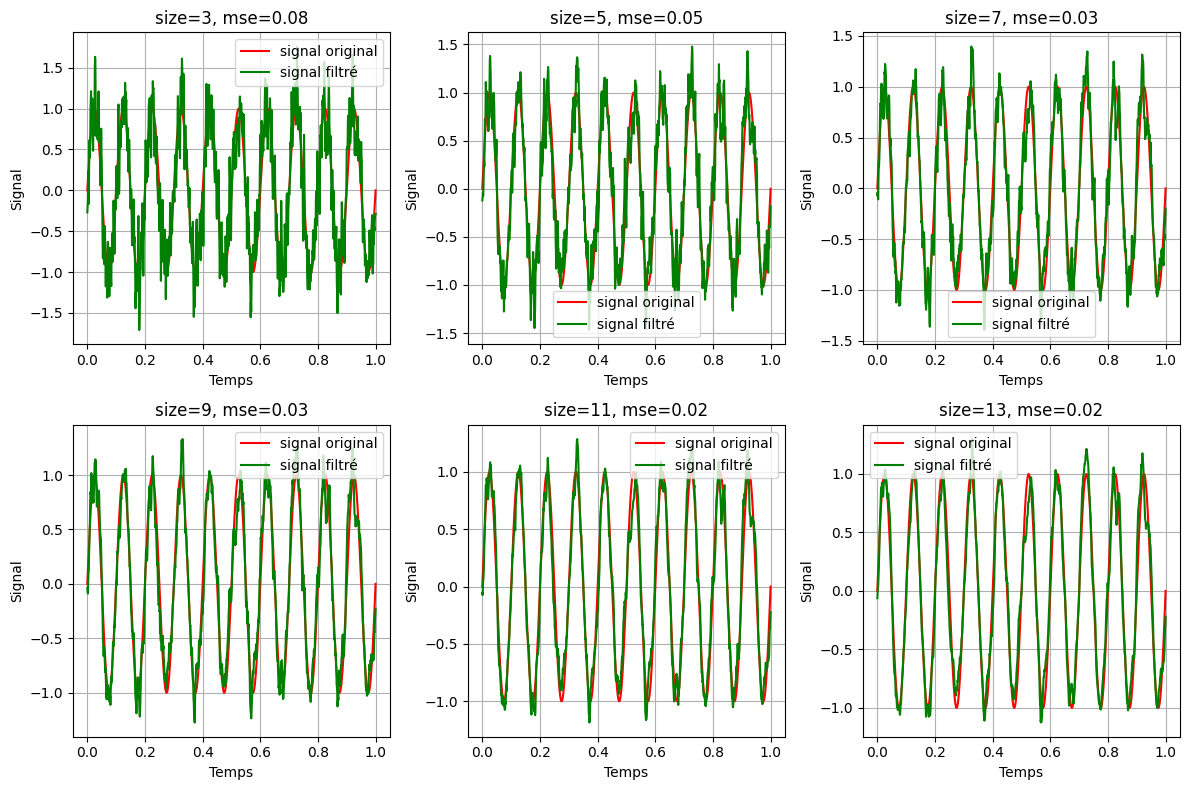

In [41]:
#Affichage pour differentes valeurs de size
size=[3, 5 , 7 , 9 , 11 , 13]
sigma=5
plt.figure(figsize=(12, 8))
MSE_g=[]
for i, s in enumerate(size):
  s_g=np.convolve(s_b, gaussian(s, sigma), mode='same')
  mse=np.sum((s_g-s_t)**2/len(s_t))
  MSE_g.append(mse)
  plt.subplot(2, 3, i+1)
  plt.plot(t, s_t, color='r', label='signal original')
  plt.plot(t, s_g, color='g', label='signal filtré' )
  plt.grid(True)
  plt.xlabel('Temps')
  plt.ylabel('Signal')
  plt.title(f"size={s}, mse={mse:.2f}")
  plt.legend()
plt.tight_layout()

Text(0, 0.5, 'MSE')

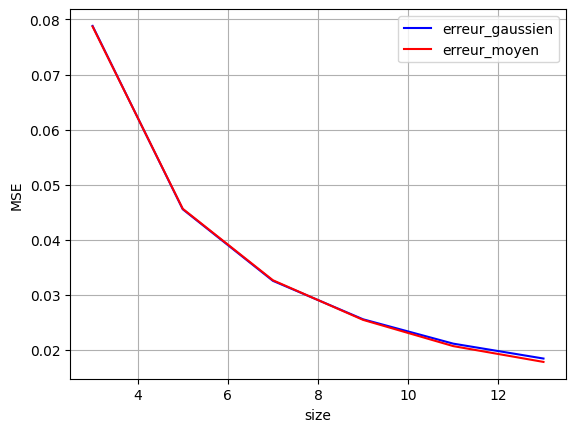

In [42]:
#Affichage de l'volution de l'erreur quadratique facee à la taille du filtre
plt.figure()
plt.plot(size, MSE_g, color='b', label='erreur_gaussien')
plt.plot(size, MSE_m, color='r', label='erreur_moyen')
plt.grid()
plt.legend()
plt.xlabel('size')
plt.ylabel('MSE')